# Advices before start an analysis

1) First define the objetive (becaus you can do a lot of differents things with data, and some of them do not add value to project (or some of them are harder to get)).

2) You need to ensure you have the appropiate data (for example, data to use to do predictions)

# Load libraries

In [158]:
import numpy
import pandas
import matplotlib.pyplot as plt
import scipy.stats
plt.style.use("bmh")

# Load data

In [159]:
# read excel file
# Almost all files are in this format (or maybe .csv)
df = pandas.read_excel("Folds5x2_pp.xlsx")

# display first rows of dataframe
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [160]:
# Basic information and stats of dataset
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


# Clean up data

In [161]:
# remove nan values
display("Is nan: ", df.isna().sum())

'Is nan: '

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [164]:
# null values
df.isnull().values.any()

False

# Analyzing correlations

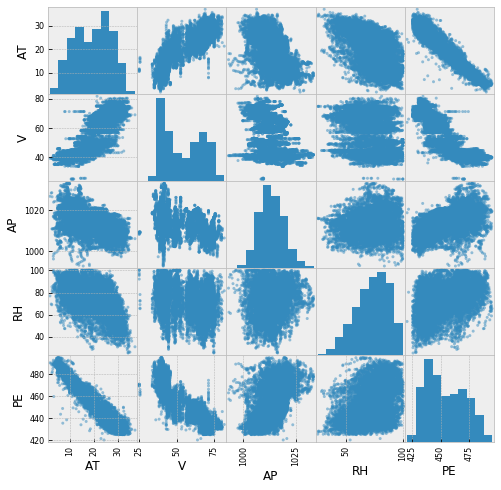

In [20]:
# load specific function
from pandas.plotting import scatter_matrix

# display the scatter matrix
scatter_matrix(df, diagonal="hist", figsize = (8, 8));

## Data analysis
- To know the variables distribution is important and it uses to be the first step in data analysis.
- Check the relation betweens differents variables

# Machine Learning models

In [178]:
# Format data

# Get the independt variables
X = df.loc[:, ["AT", "V", "AP", "RH"]]

# Get the predictor (or dependent variable)
y = df.loc[:, ["PE"]]

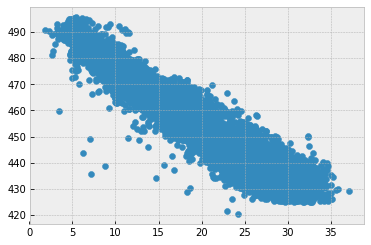

In [179]:
# plot some variables
fig, ax = plt.subplots()
ax.scatter(X.loc[:, "AT"], y)

# Linear regression (Supervised learning)

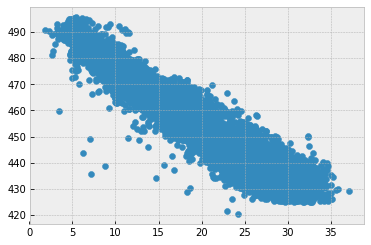

In [197]:
# data to train (select variables)
# variables: "AT", "V", "AP", "RH"
X_train = X.loc[:, ["AT"]]
# print("Dataframe shape: ", X_train.shape)

# plot variables
fig, ax = plt.subplots()
ax.scatter(X_train, y)

In [198]:
# load function to linear regression
from sklearn.linear_model import LinearRegression

# Define model
regressor = LinearRegression()

# train the linear regressor
# y is the target (labels) (this is the reason becaus of supervised learning)
# minimize the residual sum of squares between the observed targets in the dataset
regressor.fit(X_train, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [199]:
# get R2 score
regressor.score(X_train, y)

0.8989475964148236

In [200]:
regressor.intercept_

array([497.03411989])

In [201]:
regressor.coef_

array([[-2.17131996]])

Linear Regressor: 

- PE = 344.07 - 2.17 * AT 
- R2 score: 0.89

# Plot the linear regressor on data 
This only works for univariate linear regression

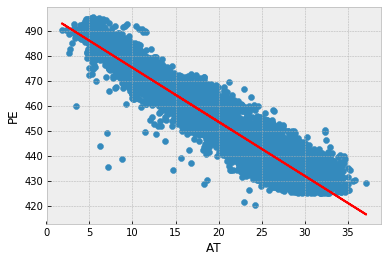

In [208]:
# plot variables
fig, ax = plt.subplots()
ax.scatter(X_train, y)

ax.set_xlabel("AT")
ax.set_ylabel("PE")

# ploting the line
ax.plot(X_train, regressor.intercept_[0] + regressor.coef_[0]*X_train, c = "r")

# Predictions with linear regression

In [224]:
# write a value for the independent variable
independent_variable = 20

# do the prediction
prediction = regressor.predict(np.array([[independent_variable]]))

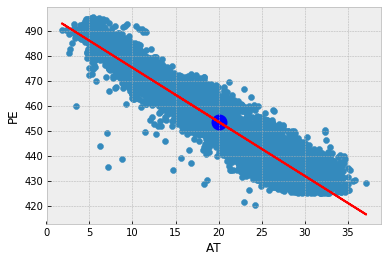

In [225]:
# Plot predictions

# plot variables
fig, ax = plt.subplots()
ax.scatter(X_train, y)

# set legend to labels
ax.set_xlabel("AT")
ax.set_ylabel("PE")

# ploting the line
ax.plot(X_train, regressor.intercept_[0] + regressor.coef_[0]*X_train, c = "r")

# plot prediction
ax.scatter(independent_variable, prediction, c = "b", lineWidth = 10)

# Important things to know
- In real projects, you have to split the data on training / validation / testing to validate if the model is generalizing.
- In real projects there are metrics to validate if the model is working well. Some of them are precision, accuracy, F1 score (For classification)

# PCA (Unsupervised Learning)

In [229]:
# data to train (select variables)
# variables: "AT", "V", "AP", "RH"
X_train_PCA = X
# print("Dataframe shape: ", X_train.shape)

# # plot variables
# fig, ax = plt.subplots()
# ax.scatter(X_train_PCA.loc[:, "AT"], y)

In [238]:
# load library
from sklearn.decomposition import PCA

# Define model
pca = PCA(n_components=1, svd_solver='full')

# train model
# note that it does not need the target (unsupervised learning)
pca.fit(X_train_PCA)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [239]:
print(pca.explained_variance_ratio_)

[0.62989873]


In [240]:
X_transform = pca.transform(X_train_PCA)

In [241]:
X_train_PCA.shape

(9568, 4)

In [242]:
X_transform.shape

(9568, 1)

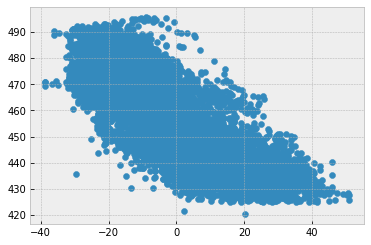

In [243]:
# plot variables
fig, ax = plt.subplots()
ax.scatter(X_transform, y)

In [246]:
# Define model
regressor_PCA = LinearRegression()

# train the linear regressor
# y is the target (labels) (this is the reason becaus of supervised learning)
# minimize the residual sum of squares between the observed targets in the dataset
regressor_PCA.fit(X_transform, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [247]:
# write a value for the independent variable
independent_variable_PCA = 20

# do the prediction
prediction_PCA = regressor_PCA.predict(np.array([[independent_variable_PCA]]))

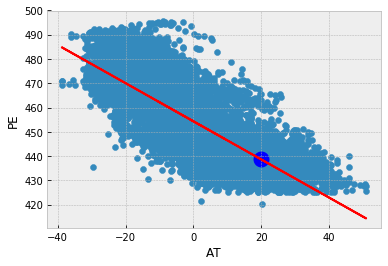

In [248]:
# Plot predictions

# plot variables
fig, ax = plt.subplots()
ax.scatter(X_transform, y)

# set legend to labels
ax.set_xlabel("AT")
ax.set_ylabel("PE")

# ploting the line
ax.plot(X_transform, regressor_PCA.intercept_[0] + regressor_PCA.coef_[0]*X_transform, c = "r")

# plot prediction
ax.scatter(independent_variable_PCA, prediction_PCA, c = "b", lineWidth = 10)

In [250]:
# get R2 score
regressor.score(X_transform, y)

0.6217090146781141